In [4]:
from PIL import Image
from numpy import *
from pylab import *
import scipy.misc

In [5]:
from scipy.cluster.vq import *

In [6]:
from scipy.misc import imresize

In [25]:
import os
import hcluster
hcluster = reload(hcluster)

In [26]:
path = 'flickr-sunsets/'
imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]

In [27]:
features = zeros([len(imlist), 512])
for i, f in enumerate(imlist):
    im = array(Image.open(f))

    h, edges = histogramdd(im.reshape(-1, 3), 8, normed=True, range=[(0,255), (0, 255), (0, 255)])

    features[i] = h.flatten()

In [28]:
tree = hcluster.hcluster(features)

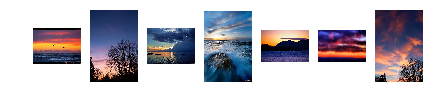

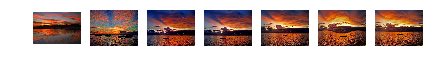

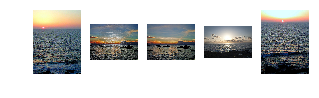

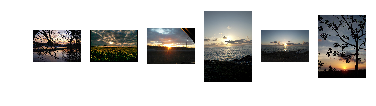

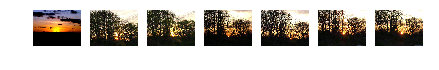

In [31]:
#clusters = tree.extract_clusters(0.23*tree.distance)
clusters = tree.extract_clusters_by_num(8)

for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    if nbr_elements>3:
        figure(figsize=(8, 8))
        for p in range(minimum(nbr_elements, 20)):
            subplot(4, 8, p+1)
            im = array(Image.open(imlist[elements[p]]))
            imshow(im)
            axis('off')
show()

In [32]:
hcluster.draw_dendrogram(tree, imlist, filename='sunset.pdf')

In [33]:
# font images
import imtools
import pickle
imlist = imtools.get_imlist('selected_fontimages/')
imnbr = len(imlist)
with open('font_pca_modes.pkl', 'rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)
immatrix = array([array(Image.open(im)).flatten() for im in imlist], 'f')
immean = immean.flatten()
projected = array([dot(V[:40], immatrix[i]-immean) for i in range(imnbr)])
tree = hcluster.hcluster(projected)
hcluster.draw_dendrogram(tree, imlist, filename='fonts.jpg')

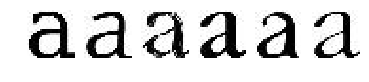

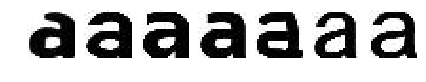

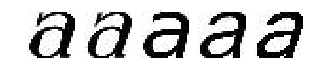

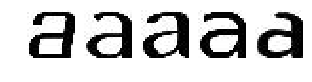

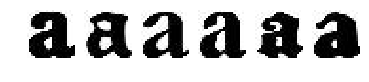

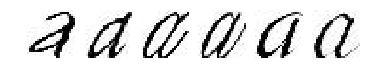

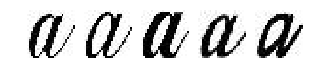

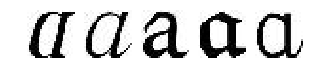

In [37]:
clusters = tree.extract_clusters_by_num(8)

for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    if nbr_elements>3:
        figure(figsize=(8, 8))
        gray()
        for p in range(minimum(nbr_elements, 20)):
            subplot(4, 8, p+1)
            im = array(Image.open(imlist[elements[p]]))
            imshow(im)
            axis('off')
show()